In [83]:
import json
import requests
import pandas as pd
from textblob import TextBlob  # Import TextBlob for sentiment analysis

In [58]:
'''
THIS IS THE CODE USED TO SCRAPE THE DATAFRAMES BASED ON THE KEYWORDS(HASHTAGS).
This was made possible with the original code from:
https://jrashford.com/2023/02/13/how-to-scrape-mastodon-timelines-using-python-and-pandas/
And a lot of research on reddit, stackoverflow, errors on CHATGPT and Documentation.
'''

import json
import requests
import pandas as pd

# TRENDING TOPICS HERE, PLEASE
hashtags = ['ONS'] #change to the chosen trending topics

results = []
is_end = False
limit = 70

for hashtag in hashtags:
    URL = f'https://mastodon.social/api/v1/timelines/tag/{hashtag}'
    params = {
        'limit': limit
    }

start_date = pd.Timestamp('2023-11-05', tz='utc')
end_date = pd.Timestamp('2023-12-05', tz='utc')

while not is_end:
    try:
        r = requests.get(URL, params=params)
        r.raise_for_status()

        api_response = json.loads(r.text)

        if len(api_response) == 0:
            break

        for t in api_response:
            timestamp = pd.Timestamp(t['created_at'], tz='utc')

            if start_date <= timestamp <= end_date:
                results.append(t)

            elif timestamp < start_date:
                is_end = True
                break

        if is_end:
            break

        max_id = api_response[-1]['id']
        params['max_id'] = max_id

    except requests.exceptions.HTTPError as errh:
        print('HTTP Error:', errh)
        break
    except requests.exceptions.RequestException as err:
        print('Error:', err)
        break

df = pd.json_normalize(results)

# Save the DataFrame to a CSV file
df.to_csv('output.csv', index=False)

print("Columns:", df.columns)
print("Number of Rows:", len(df))

if not df.empty:
    print("Sample Row:", df.iloc[0])
else:
    print("DataFrame is empty.")
    
    

Columns: Index(['id', 'created_at', 'in_reply_to_id', 'in_reply_to_account_id',
       'sensitive', 'spoiler_text', 'visibility', 'language', 'uri', 'url',
       'replies_count', 'reblogs_count', 'favourites_count', 'edited_at',
       'content', 'reblog', 'media_attachments', 'mentions', 'tags', 'emojis',
       'card', 'poll', 'account.id', 'account.username', 'account.acct',
       'account.display_name', 'account.locked', 'account.bot',
       'account.discoverable', 'account.group', 'account.created_at',
       'account.note', 'account.url', 'account.uri', 'account.avatar',
       'account.avatar_static', 'account.header', 'account.header_static',
       'account.followers_count', 'account.following_count',
       'account.statuses_count', 'account.last_status_at', 'account.emojis',
       'account.fields', 'card.url', 'card.title', 'card.description',
       'card.language', 'card.type', 'card.author_name', 'card.author_url',
       'card.provider_name', 'card.provider_url', 'ca

In [68]:
'''
Testing the appropriate lists of columns, using the list of tweets as an example.
'''

import pandas as pd

twitter = pd.read_csv('twitter.csv')

column_list=['id', 'created_at', 'in_reply_to_id', 'in_reply_to_account_id','tags','language', 'replies_count', 'reblogs_count', 'favourites_count',
 'content','media_attachments','mentions','account.id', 'account.username','account.display_name', 'account.bot','account.created_at', 
'account.followers_count', 'account.following_count', 'account.statuses_count', 'account.last_status_at']

twitter_final = twitter[column_list]

twitter_final.head(10)

,id,created_at,in_reply_to_id,in_reply_to_account_id,tags,language,replies_count,reblogs_count,favourites_count,content,...,mentions,account.id,account.username,account.display_name,account.bot,account.created_at,account.followers_count,account.following_count,account.statuses_count,account.last_status_at
0,111524782024215566,2023-12-04T23:38:42.788Z,1.115247e+17,1234906.0,"[{'name': '4k', 'url': 'https://mastodon.socia...",NaN,1,0,1,"<p>Yeah so the <a class=""hashtag"" href=""https:...",...,"[{'id': '1234906', 'username': 'realcaseyrolli...",1234906,realcaseyrollins,realcaseyrollins ✝️,False,2020-07-01T00:00:00.000Z,510,246,28701,2023-12-06
1,111524748385780199,2023-12-04T23:30:06.000Z,NaN,NaN,"[{'name': 'tweets', 'url': 'https://mastodon.s...",en,0,0,0,"<p><a href=""https://www.usluck.com/131965/im-s...",...,[],110748756915542912,usluck,USLUCK,False,2023-07-20T00:00:00.000Z,227,0,45195,2023-12-06
2,111524740330155806,2023-12-04T23:28:04.000Z,NaN,NaN,"[{'name': 'tweets', 'url': 'https://mastodon.s...",en,0,0,0,"<p><a href=""https://www.usluck.com/131963/that...",...,[],110748756915542912,usluck,USLUCK,False,2023-07-20T00:00:00.000Z,227,0,45195,2023-12-06
3,111524630427384628,2023-12-04T23:00:10.994Z,NaN,NaN,"[{'name': 'twitter', 'url': 'https://mastodon....",en,0,1,0,<p>help The BoneBat Show bring the &quot;Comed...,...,[],109360959456805523,filmfreakmafia,Filmfreak Mafia,False,2022-11-17T00:00:00.000Z,41,19,4300,2023-12-06
4,111524567482138018,2023-12-04T22:44:06.000Z,NaN,NaN,"[{'name': 'tweets', 'url': 'https://mastodon.s...",en,0,0,0,"<p><a href=""https://www.usluck.com/131935/this...",...,[],110748756915542912,usluck,USLUCK,False,2023-07-20T00:00:00.000Z,227,0,45195,2023-12-06
5,111524559479003288,2023-12-04T22:42:04.000Z,NaN,NaN,"[{'name': 'tweets', 'url': 'https://mastodon.s...",en,0,0,0,"<p><a href=""https://www.usluck.com/131933/whil...",...,[],110748756915542912,usluck,USLUCK,False,2023-07-20T00:00:00.000Z,227,0,45195,2023-12-06
6,111524539288077029,2023-12-04T22:36:48.000Z,NaN,NaN,"[{'name': 'twitter', 'url': 'https://mastodon....",ja,0,0,0,"<p><a href=""https://mstdn.jp/tags/%E3%82%A2%E3...",...,[],110205620691279091,kimoota09,荒ぶるキモヲタ君＠倉庫,False,2023-03-03T00:00:00.000Z,72,1,424,2023-12-05
7,111524516401674594,2023-12-04T22:31:10.000Z,NaN,NaN,"[{'name': 'twitter', 'url': 'https://mastodon....",en,0,2,1,"<p>I’ve been missing <a href=""https://mas.to/t...",...,[],111320687918100468,diurnalli,diurnalli,False,2023-10-29T00:00:00.000Z,113,17,18,2023-12-04
8,111524504445478872,2023-12-04T22:28:05.000Z,NaN,NaN,"[{'name': 'alexsingleton', 'url': 'https://mas...",en,0,0,0,<p>Twitter still can't believe Alex Singleton'...,...,[],109757680205656117,DenverBroncosNews,Denver Broncos News,True,2023-01-25T00:00:00.000Z,38,0,3456,2023-12-06
9,111524491502715965,2023-12-04T22:24:49.795Z,NaN,NaN,"[{'name': 'federacion', 'url': 'https://mastod...",NaN,1,0,0,"<p><a href=""https://hispagatos.space/@argument...",...,"[{'id': '106744036540832226', 'username': 'arg...",111437496845736853,flan,Custard! 🍮,False,2023-11-19T00:00:00.000Z,45,48,163,2023-12-06


In [23]:
'''
Sentiment analysis:
'''
import pandas as pd
from textblob import TextBlob

mastodon_final_v2 = pd.read_csv('mastodon_final_v2_nodup.csv')

def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply the sentiment analysis function to the 'content' column
mastodon_final_v2['sentiment_score'] = mastodon_final_v2['content'].apply(get_sentiment)

def classify_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

mastodon_final_v2['sentiment'] = mastodon_final_v2['sentiment_score'].apply(classify_sentiment)

mastodon_sentiment = mastodon_final_v2[['content', 'sentiment_score', 'sentiment']].copy()

print(mastodon_sentiment)

# Save the new DataFrame to a CSV file
mastodon_sentiment.to_csv('mastodon_sentiment.csv', index=False)

                                                content  sentiment_score  \
0     @takeyrtime Por cierto https://www.moddb.com/m...         0.146667   
1     #Argentina 🇦🇷 · En campaña: NO #BRICS  ni "neg...         0.000000   
2     3. #ArgentinaEn pocos días la web no va a exis...         0.000000   
3     2. #ArgentinaA TODO EL MUNDO 🔊 descarguen de m...         0.000000   
4     Con Nestor se llego a reestructurar la deuda h...         0.000000   
...                                                 ...              ...   
2611  @sarahc whats wild is not only are hate and fa...        -0.275000   
2612  Second impression of #bluesky: People are just...         0.081548   
2613  Das Prinzip der #KünstlicheVerknappung, mit de...         0.000000   
2614  @erik Wie immer: wegen der #Reichweite. Desweg...         0.000000   
2615  Vielen Dank für den Bericht. Teil des Antrages...         0.000000   

     sentiment  
0     Positive  
1      Neutral  
2      Neutral  
3      Neutral  
4 

In [84]:
'''
Cleaning up the columns for better researching the sentiment:
'''

from bs4 import BeautifulSoup
import pandas as pd

mastodon_final = pd.read_csv('Mastodon_Final.csv')

def remove_html_tags(text):
    if pd.isna(text) or isinstance(text, bool):
        return text
    
    soup = BeautifulSoup(str(text), 'html.parser')
    return soup.get_text()

for column in mastodon_final.columns:
    if mastodon_final[column].dtype == 'O':
        mastodon_final[column] = mastodon_final[column].apply(remove_html_tags)

# Drop rows with NaN values after processing
mastodon_final = mastodon_final.dropna()


mastodon_final.to_csv('mastodon_final_v2.csv', index=False)

# Print the resulting DataFrame
print(mastodon_final[['content']])




/var/folders/b_/kp_80m4j1c31g3yky48_ftdc0000gn/T/ipykernel_49870/1130213172.py:10: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(str(text), 'html.parser')


                                                 content
3      @takeyrtime Por cierto https://www.moddb.com/m...
18     #Argentina 🇦🇷 · En campaña: NO #BRICS  ni "neg...
21     3. #ArgentinaEn pocos días la web no va a exis...
22     2. #ArgentinaA TODO EL MUNDO 🔊 descarguen de m...
68     Con Nestor se llego a reestructurar la deuda h...
...                                                  ...
36377  @sarahc whats wild is not only are hate and fa...
36394  Second impression of #bluesky: People are just...
36395  Das Prinzip der #KünstlicheVerknappung, mit de...
36405  @erik Wie immer: wegen der #Reichweite. Desweg...
36415  Vielen Dank für den Bericht. Teil des Antrages...

[2887 rows x 1 columns]


In [22]:
import pandas as pd

# Load data
mastodon_final = pd.read_csv('mastodon_final_nodup.csv')
mastodon_final_cleaned = pd.read_csv('mastodon_final_v2_nodup.csv')

# User Demographics and Behavior
user_demographics_behavior = mastodon_final[['account.id', 'account.username', 'account.display_name', 'account.bot', 'account.created_at', 'account.followers_count', 'account.following_count', 'account.statuses_count', 'account.last_status_at']]

# Total most active users
most_active_users = user_demographics_behavior.sort_values(by='account.statuses_count', ascending=False).head(10)

# Analysis of profile statistics and behavior
profile_analysis = user_demographics_behavior.describe()

# Check for bots
bots_accounts = mastodon_final[['account.username', 'account.bot']].groupby(['account.bot']).count()

# Display results
print("User Demographics and Behavior:")
print(user_demographics_behavior.head())

print("\nTotal Most Active Users:")
print(most_active_users)

print("\nProfile Statistics and Behavior Analysis:")
print(profile_analysis)

print("\nAnalysis of Bots:")
print(bots_accounts)

User Demographics and Behavior:
           account.id account.username account.display_name  account.bot  \
0  109522427936071841          mreader          Mike Reader        False   
1  109470773270955555             emsc     AllQuakes - EMSC         True   
2  109470773270955555             emsc     AllQuakes - EMSC         True   
3  108950626336567355            fanta             fanta ☑️        False   
4  109943696965534606    janettespeyer        JanetteSpeyer        False   

         account.created_at  account.followers_count  account.following_count  \
0  2022-12-16T00:00:00.000Z                      184                      562   
1  2022-11-23T00:00:00.000Z                     1008                        0   
2  2022-11-23T00:00:00.000Z                     1008                        0   
3  2022-09-06T00:00:00.000Z                     6488                     5683   
4  2023-02-28T00:00:00.000Z                      327                      295   

   account.statuses_coun

In [21]:
import pandas as pd

# Load data
mastodon_final = pd.read_csv('mastodon_final_nodup.csv')
mastodon_final_cleaned = pd.read_csv('mastodon_final_v2_nodup.csv')

# User Demographics and Behavior
user_demographics_behavior = mastodon_final_cleaned[['account.id', 'account.username', 'account.display_name', 'account.bot', 'account.created_at', 'account.followers_count', 'account.following_count', 'account.statuses_count', 'account.last_status_at']]

# Total most active users
most_active_users = user_demographics_behavior.sort_values(by='account.statuses_count', ascending=False).head(10)

# Analysis of profile statistics and behavior
profile_analysis = user_demographics_behavior.describe()

# Check for bots
bots_accounts = mastodon_final_cleaned[['account.username', 'account.bot']].groupby(['account.bot']).count()

# Display results
print("User Demographics and Behavior:")
print(user_demographics_behavior.head())

print("\nTotal Most Active Users:")
print(most_active_users)

print("\nProfile Statistics and Behavior Analysis:")
print(profile_analysis)

print("\nAnalysis of Bots:")
print(bots_accounts)

User Demographics and Behavior:
           account.id account.username account.display_name  account.bot  \
0  108950626336567355            fanta             fanta ☑️        False   
1              508125         danddv77  Daniel🔻Es/Mx :fedi:        False   
2  110159867477434197         MaryRead             MaryRead        False   
3  110159867477434197         MaryRead             MaryRead        False   
4             1015318        PinkWhale         Pink Whale 💚        False   

         account.created_at  account.followers_count  account.following_count  \
0  2022-09-06T00:00:00.000Z                     6488                     5683   
1  2018-08-30T00:00:00.000Z                      688                      486   
2  2023-04-07T00:00:00.000Z                      241                      167   
3  2023-04-07T00:00:00.000Z                      241                      167   
4  2019-11-28T00:00:00.000Z                       82                       86   

   account.statuses_coun

/Users/daniellelott/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniellelott/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/daniellelott/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/daniellelott/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

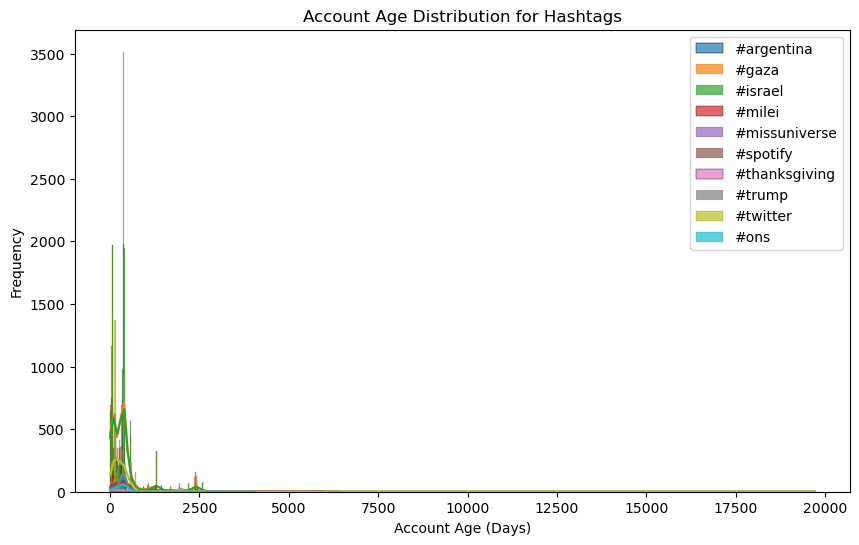

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
mastodon_final = pd.read_csv('mastodon_final_nodup.csv')

# Convert 'created_at' to datetime if not already and localize to UTC
mastodon_final['account.created_at'] = pd.to_datetime(mastodon_final['account.created_at'], utc=True)

# Calculate account ages
mastodon_final['account_age'] = (pd.to_datetime('today', utc=True) - mastodon_final['account.created_at']).dt.days

# Plot age distribution
plt.figure(figsize=(10, 6))
for hashtag in ['argentina', 'gaza', 'israel', 'milei', 'missuniverse', 'spotify', 'thanksgiving', 'trump', 'twitter', 'ons']:
    hashtag_df = mastodon_final[mastodon_final['tags'].str.contains(hashtag, case=False, na=False)]
    sns.histplot(hashtag_df['account_age'], kde=True, label=f'#{hashtag}', alpha=0.7)

plt.title('Account Age Distribution for Hashtags')
plt.xlabel('Account Age (Days)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [18]:
'''
Cleaning the DFs as they had many duplicate entries.
'''

mastodon_final = pd.read_csv('Mastodon_Final.csv')
mastodon_final_without_dup = mastodon_final.drop_duplicates()

mastodon_final_without_dup.to_csv('mastodon_final_nodup.csv', index=False)

In [19]:
mastodon_final_v2 = pd.read_csv('mastodon_final_v2.csv')
mastodon_final_v2_without_dup = mastodon_final_v2.drop_duplicates()

mastodon_final_v2_without_dup.to_csv('mastodon_final_v2_nodup.csv', index=False)

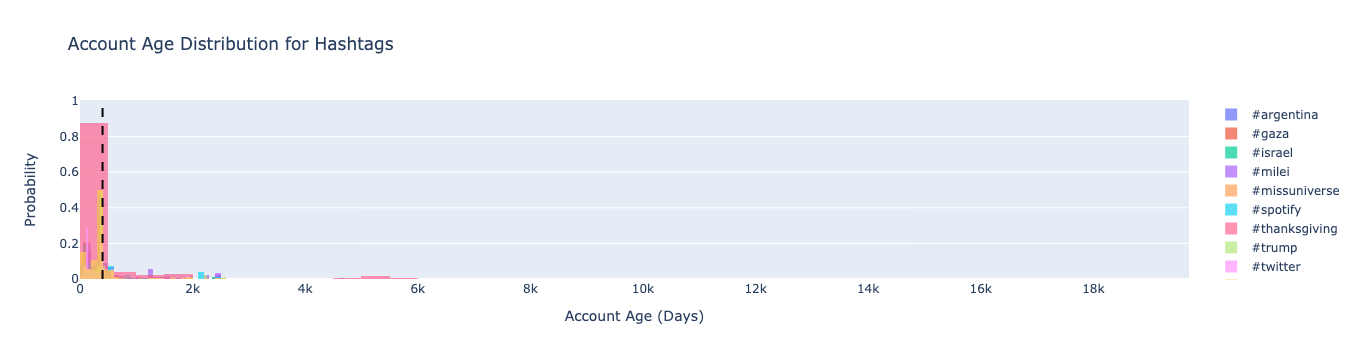

In [29]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

# Load data
mastodon_final = pd.read_csv('mastodon_final_nodup.csv')

# Convert 'created_at' to datetime if not already and localize to UTC
mastodon_final['account.created_at'] = pd.to_datetime(mastodon_final['account.created_at'], utc=True)

# Calculate account ages
mastodon_final['account_age'] = (pd.to_datetime('today', utc=True) - mastodon_final['account.created_at']).dt.days

# Create a figure
fig = go.Figure()

# Add histograms for each hashtag
for hashtag in ['argentina', 'gaza', 'israel', 'milei', 'missuniverse', 'spotify', 'thanksgiving', 'trump', 'twitter', 'ons']:
    hashtag_df = mastodon_final[mastodon_final['tags'].str.contains(hashtag, case=False, na=False)]
    fig.add_trace(go.Histogram(
        x=hashtag_df['account_age'],
        opacity=0.7,
        name=f'#{hashtag}',
        histnorm='probability',
    ))

# Add a vertical line at 400 days
fig.add_shape(
    type='line',
    x0=400,
    x1=400,
    y0=0,
    y1=1,
    line=dict(color='black', width=2, dash='dash'),
)

# Update layout
fig.update_layout(
    title='Account Age Distribution for Hashtags',
    xaxis_title='Account Age (Days)',
    yaxis_title='Probability',
    barmode='overlay',
)

# Show plot
fig.show()

In [28]:
mastodon_final = pd.read_csv('mastodon_final_nodup.csv')

mastodon_final.head()

,id,created_at,in_reply_to_id,in_reply_to_account_id,tags,language,replies_count,reblogs_count,favourites_count,content,...,mentions,account.id,account.username,account.display_name,account.bot,account.created_at,account.followers_count,account.following_count,account.statuses_count,account.last_status_at
0,111524685155296050,2023-12-04T23:14:05.000Z,NaN,NaN,"[{'name': 'sports', 'url': 'https://mastodon.s...",en,0,0,0,<p>Imagine going to Bank of America Stadium to...,...,[],109522427936071841,mreader,Mike Reader,False,2022-12-16T00:00:00.000Z,184,562,1255,2023-12-06
1,111524382217553175,2023-12-04T21:57:03.000Z,NaN,NaN,"[{'name': 'earthquake', 'url': 'https://mastod...",en,0,0,0,"<p>🔔<a href=""https://masto.ai/tags/Earthquake""...",...,[],109470773270955555,emsc,AllQuakes - EMSC,True,2022-11-23T00:00:00.000Z,1008,0,81235,2023-12-06
2,111524271999331203,2023-12-04T21:29:00.000Z,NaN,NaN,"[{'name': 'earthquake', 'url': 'https://mastod...",en,0,0,0,"<p>🔔<a href=""https://masto.ai/tags/Earthquake""...",...,[],109470773270955555,emsc,AllQuakes - EMSC,True,2022-11-23T00:00:00.000Z,1008,0,81235,2023-12-06
3,111524055057799348,2023-12-04T20:33:50.000Z,1.115240e+17,1052392.0,"[{'name': 'argentina', 'url': 'https://mastodo...",es,1,0,1,"<p><span class=""h-card"" translate=""no""><a href...",...,"[{'id': '1052392', 'username': 'takeyrtime', '...",108950626336567355,fanta,fanta ☑️,False,2022-09-06T00:00:00.000Z,6488,5683,1749,2023-12-06
4,111523909484507098,2023-12-04T19:56:45.000Z,NaN,NaN,"[{'name': 'photography', 'url': 'https://masto...",en,1,5,4,"<p>Puerto Madero, Argentina. <a href=""https://...",...,[],109943696965534606,janettespeyer,JanetteSpeyer,False,2023-02-28T00:00:00.000Z,327,295,1480,2023-12-06


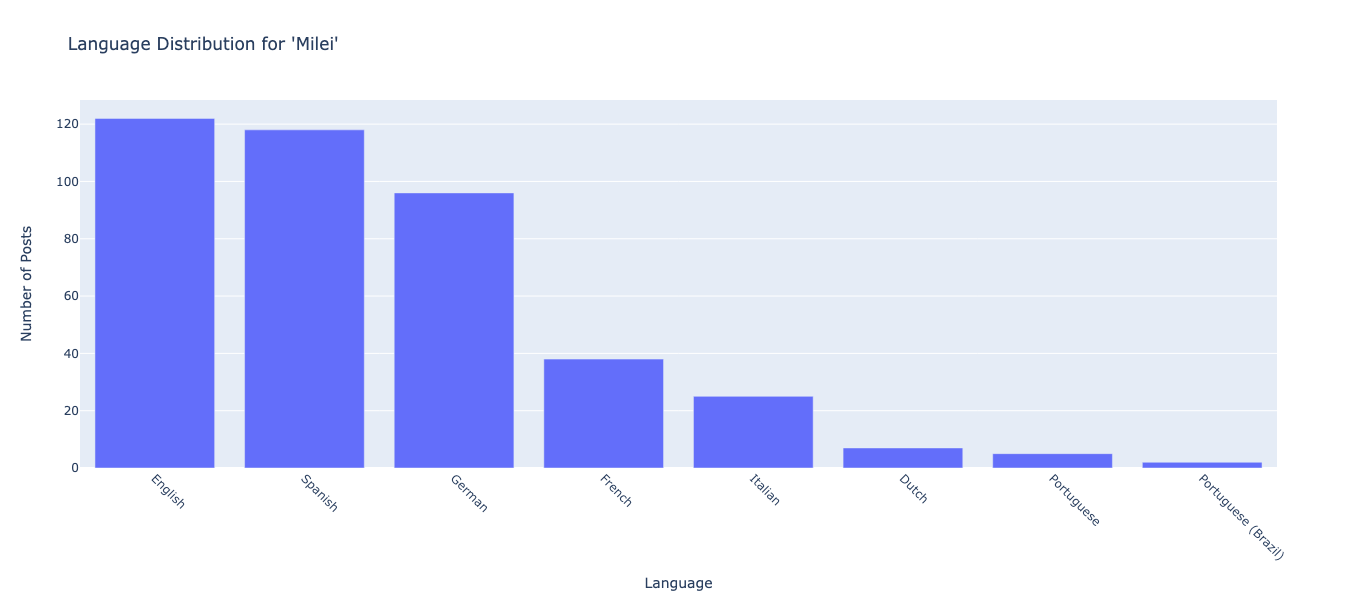

In [31]:
import plotly.graph_objects as go
import numpy as np

df_milei = pd.read_csv('./data/milei.csv')

# Create a dictionary mapping the specified language codes to full names
language_full_names = {
    'en': 'English', 
    'es': 'Spanish',
    'de': 'German',
    'fr': 'French',
    'it': 'Italian',
    'nl': 'Dutch',
    'pt': 'Portuguese',
    'pt-br': 'Portuguese (Brazil)'
}


# Get the language distribution for the specified languages
language_distribution = df_milei['language'].value_counts()
language_distribution = language_distribution[language_distribution.index.isin(language_full_names.keys())]

# Update the index to full language names
language_distribution.index = [language_full_names[code] for code in language_distribution.index]

# Create the figure
fig = go.Figure()

# Add the bar chart, using absolute numbers for the y values
fig.add_trace(
    go.Bar(x=language_distribution.index, y=language_distribution.values)
)

# Update layout
fig.update_layout(
    title_text="Language Distribution for 'Milei'",
    xaxis_title="Language",
    yaxis_title="Number of Posts",
    height=600,
    width=800
)

# Update x-axis tick angle
fig.update_xaxes(tickangle=45)

# Show the figure
fig.show()

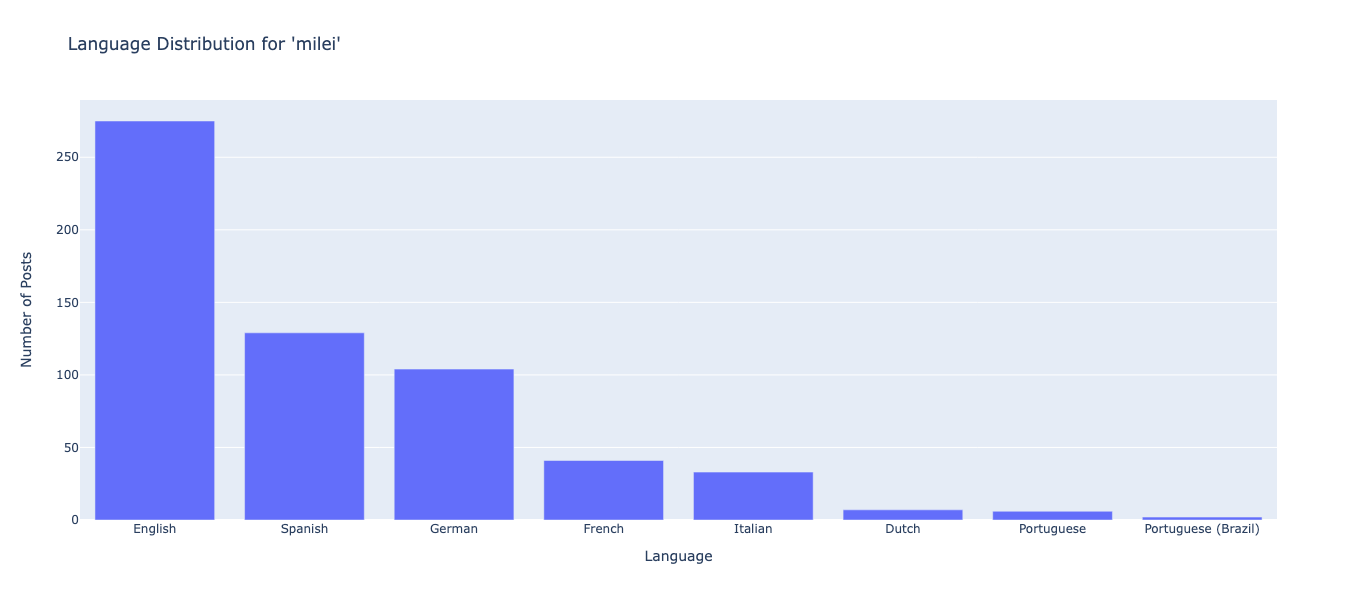

In [35]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

mastodon_final = pd.read_csv('./data/mastodon_final_nodup.csv')

tag_of_interest = 'milei'
df = mastodon_final[mastodon_final['tags'].str.contains(tag_of_interest, case=False, na=False)]
desired_languages = ['en', 'es', 'de', 'fr', 'it', 'nl', 'pt', 'pt-br']
language_distribution = df[df['language'].isin(desired_languages)]['language'].value_counts()

fig = go.Figure()

fig.add_trace(
    go.Bar(x=language_distribution.index.map(language_full_names), y=language_distribution.values, name=f"Language Distribution for '{tag_of_interest}'")
)

fig.update_layout(
    title_text=f"Language Distribution for '{tag_of_interest}'",
    xaxis_title="Language",
    yaxis_title="Number of Posts",
    height=600,
    width=800
)

fig.show()

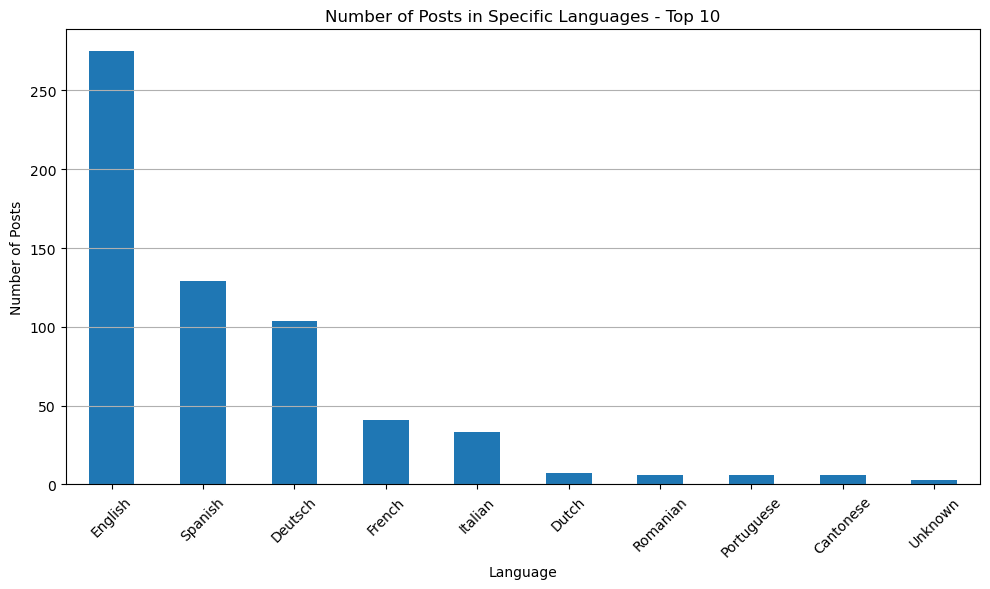

In [34]:
import matplotlib.pyplot as plt

language_codes = {
    'en': 'English', 
    'es': 'Spanish', 
    'it': 'Italian', 
    'ro': 'Romanian',
    'ja': 'Japanese',
    'ca': 'Cantonese',
    'fr': 'French',
    'pt': 'Portuguese',
    'de': 'Deutsch',
    'nl': 'Dutch',
}

language_distribution = df['language'].value_counts().head(10)
language_distribution.index = language_distribution.index.map(lambda code: language_codes.get(code, 'Unknown').capitalize())
plt.figure(figsize=(10, 6))

language_distribution.plot(kind='bar')
plt.title('Number of Posts in Specific Languages - Top 10')
plt.xlabel('Language')
plt.ylabel('Number of Posts')

plt.xticks(rotation=45)

plt.grid(axis='y')

plt.tight_layout()

plt.show()

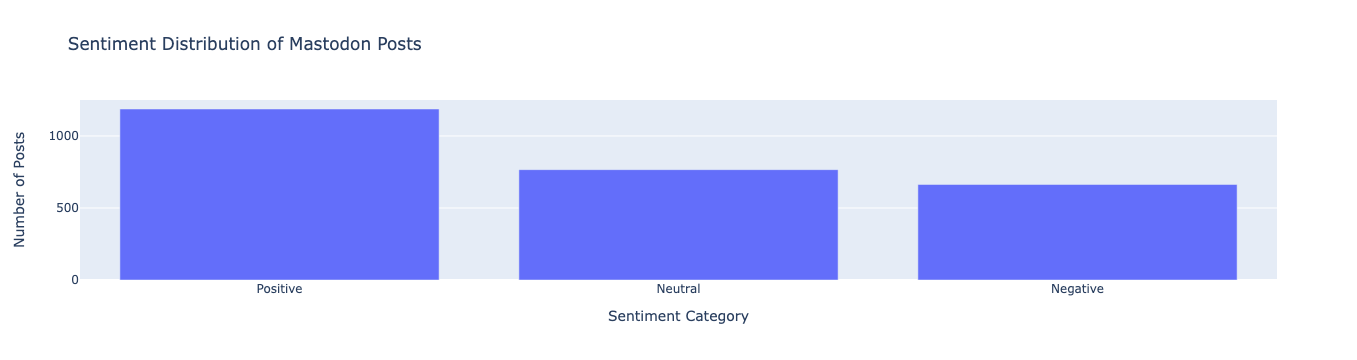

In [37]:
df_sentiments=pd.read_csv('./data/mastodon_sentiment.csv')

# Visualization
sentiment_counts = df_sentiments['sentiment'].value_counts()

# Create a Plotly bar chart
fig = go.Figure([go.Bar(x=sentiment_counts.index, y=sentiment_counts.values)])

# Update layout for title and axis labels
fig.update_layout(
    title='Sentiment Distribution of Mastodon Posts',
    xaxis_title='Sentiment Category',
    yaxis_title='Number of Posts'
)

# Show the plot
fig.show()

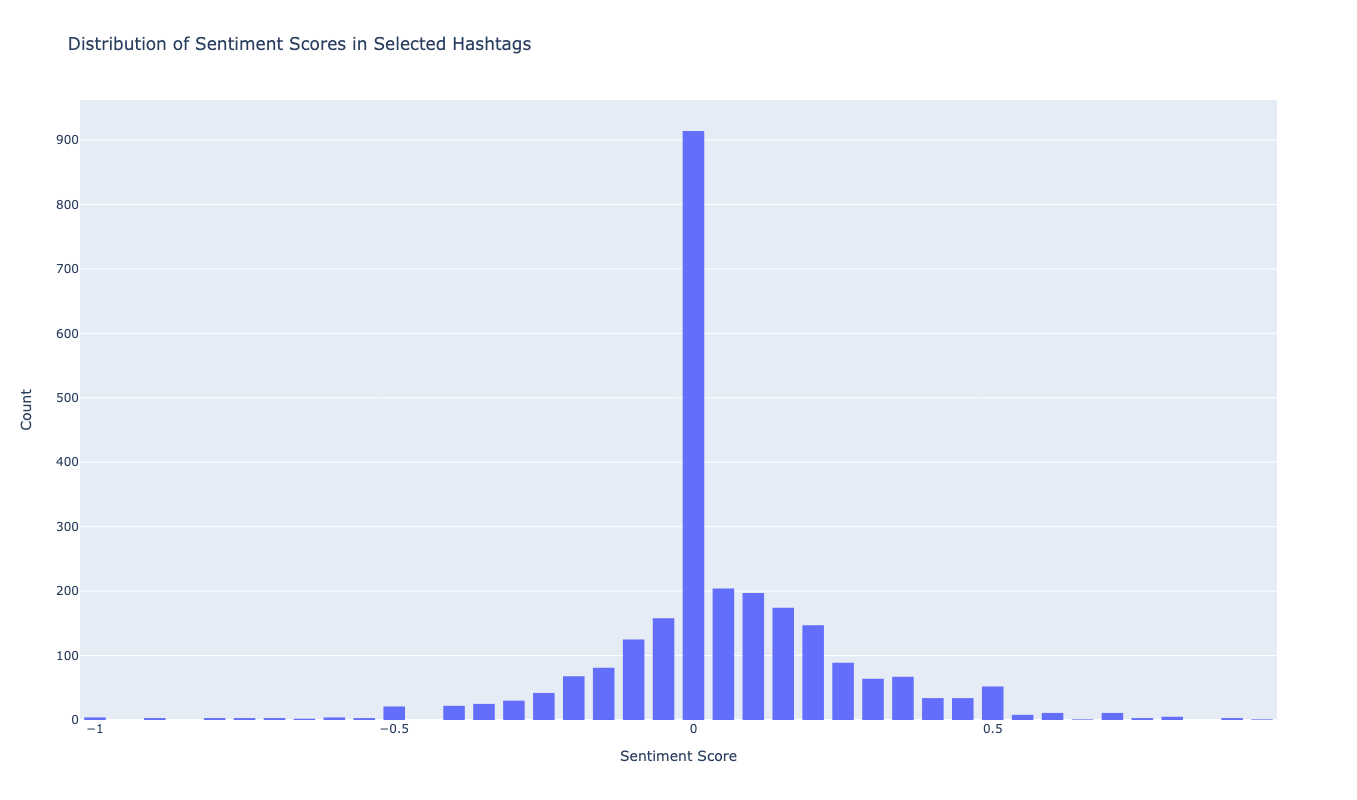

In [39]:
fig = go.Figure(data=[go.Histogram(x=df_sentiments['sentiment_score'], nbinsx=50,)])

# Update layout 
fig.update_layout(
    title_text='Distribution of Sentiment Scores in Selected Hashtags', 
    xaxis_title_text='Sentiment Score', 
    yaxis_title_text='Count', 
    bargap=0.2, 
    bargroupgap=0.1, # gap between bars of the same location coordinates
    height=800
)

fig.show()